In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LassoSelectTool, CustomJS
from bokeh.layouts import column
import numpy as np

output_notebook()

# === Datos
x = np.random.rand(100)
y = np.random.rand(100)
source = ColumnDataSource(data=dict(x=x, y=y, color=["blue"]*100, size=[10]*100))

# === Figura con herramienta de lazo
p = figure(title="Usa el lazo para seleccionar puntos", tools="lasso_select,reset")

# Círculos con color y tamaño modificables
r = p.circle('x', 'y', source=source, color='color', size='size', alpha=0.6)

# === JS para cambiar color y tamaño de puntos seleccionados
# === JS para restaurar rango al deseleccionar
callback = CustomJS(args=dict(source=source,), code="""
    const indices = source.selected.indices;
    // Si no hay selección, restaurar rango original
    if (indices.length === 0) {
        x_range.start = x_min;
        x_range.end = x_max;
        y_range.start = y_min;
        y_range.end = y_max;
    }

    source.change.emit();
""")
# === Conecta selección al callback
source.selected.js_on_change('indices', callback)

show(p)


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LassoSelectTool, CustomJS
import numpy as np

output_notebook()

# === Datos
x = np.random.rand(100)
y = np.random.rand(100)
source = ColumnDataSource(data=dict(x=x, y=y, color=["blue"]*100, size=[10]*100))

# === Guardar rangos originales
x_min = min(x)
x_max = max(x)
y_min = min(y)
y_max = max(y)

# === Figura con herramienta de lazo
p = figure(title="Usa el lazo para seleccionar puntos", tools="lasso_select,reset")

# Círculos con color y tamaño modificables
r = p.circle('x', 'y', source=source, color='color', size='size', alpha=0.6)

# === JS para restaurar rango al deseleccionar
callback = CustomJS(args=dict(source=source,
                              x_range=p.x_range,
                              y_range=p.y_range,
                              x_min=x_min, x_max=x_max,
                              y_min=y_min, y_max=y_max), code="""
    const indices = source.selected.indices;

    // Si no hay selección, restaurar rango original
    if (indices.length === 0) {
        x_range.start = x_min;
        x_range.end = x_max;
        y_range.start = y_min;
        y_range.end = y_max;
    }

    source.change.emit();
""")

# === Conecta selección al callback
source.selected.js_on_change('indices', callback)

# === Mostrar gráfico
show(p)


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, DataTable, TableColumn, Div
from bokeh.layouts import column
import pandas as pd

output_notebook()

# Datos simulados
data = {
    'Nombre': ['Juan', 'María', 'Carlos', 'Ana'],
    'Edad': [23, 35, 31, 28],
    'Puntaje': [85, 90, 78, 92]
}
df = pd.DataFrame(data)
source = ColumnDataSource(df)

# === Tabla personalizada con estilo CSS claro ===
columns = [
    TableColumn(field="Nombre", title="Nombre"),
    TableColumn(field="Edad", title="Edad"),
    TableColumn(field="Puntaje", title="Puntaje"),
]
data_table = DataTable(
    source=source,
    columns=columns,
    width=400,
    height=280,
    index_position=None,
    stylesheets=["""
        .bk-data-table {
            background-color: white !important;
            color: black !important;
            font-size: 16px !important;
            font-weight: bold !important;
            border: 2px solid black !important;
        }
        .bk-header {
            background-color: #f4d03f !important;
            color: black !important;
        }
    """]
)

# === Título ===
titulo = Div(text="""
<h2 style='color:black; background:#f4d03f; padding:10px; font-family:Arial; font-size:24px; text-align:center;'>
  Tabla de Resultados
</h2>
""")

# === Gráfico ===
p = figure(title="Puntajes por Persona", x_range=df['Nombre'], height=300,
           background_fill_color="white", border_fill_color="white")
p.vbar(x='Nombre', top='Puntaje', width=0.5, source=source, color="#3498db")

p.title.text_color = "black"
p.title.text_font_size = "18px"
p.xaxis.major_label_text_color = "black"
p.yaxis.major_label_text_color = "black"
p.outline_line_color = "black"

# Mostrar todo
show(column(titulo, data_table, p))


In [ ]:
import pandas as pd
import datetime
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

output_notebook()

# Paso 1: Crear el DataFrame desde tus listas
df = pd.DataFrame({
    'fecha': lista_fecha,
    'dato': lista_datos
})

# Paso 2: Ordenar cronológicamente por fecha
df = df.sort_values(by='fecha')

# Paso 3: Calcular mediana móvil con ventana 3 (puedes ajustar el tamaño)
window_size = 3
df['mediana_movil'] = df['dato'].rolling(window=window_size, center=True).median()

# Paso 4: Crear ColumnDataSource para Bokeh
source = ColumnDataSource(df)

# Paso 5: Crear figura
p = figure(title="Datos y Mediana Móvil", x_axis_type='datetime',
           width=800, height=400, tools="pan,wheel_zoom,box_zoom,reset")

# Línea: Datos originales
p.line('fecha', 'dato', source=source, line_width=2, color='blue', legend_label="Dato Original")

# Línea: Mediana móvil
p.line('fecha', 'mediana_movil', source=source, line_width=2, color='red', legend_label="Mediana Móvil")

# Configuración de la gráfica
p.legend.location = "top_left"
p.xaxis.axis_label = 'Fecha'
p.yaxis.axis_label = 'Valor'

# Mostrar gráfica
show(p)


NameError: name 'lista_fecha' is not defined

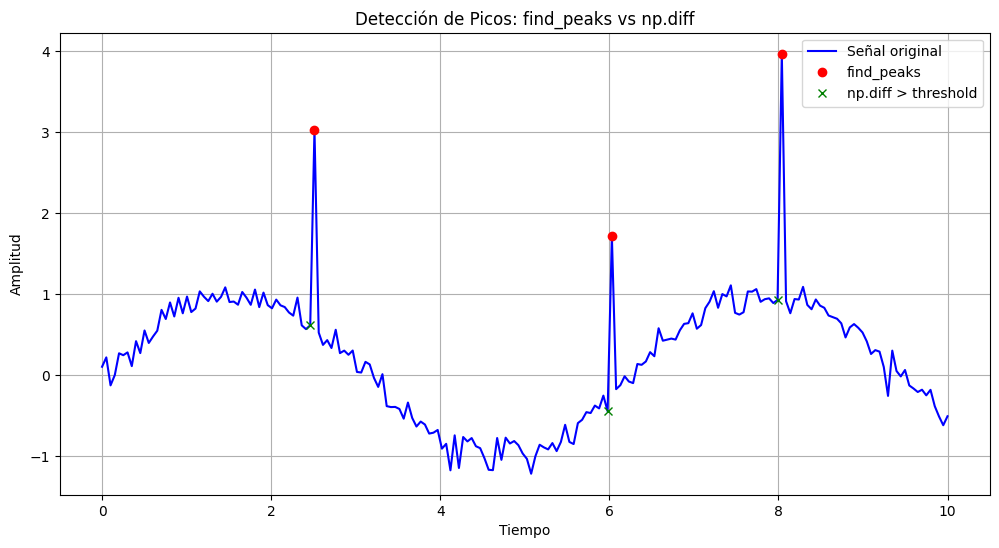

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Simulamos datos con picos artificiales
x = np.linspace(0, 10, 200)
y = np.sin(x) + np.random.normal(0, 0.1, len(x))
y[50] += 2.5  # Pico artificial
y[120] += 2   # Otro pico artificial
y[160] += 3   # Otro más

# Método 1: Detección de picos con find_peaks
peaks, _ = find_peaks(y, height=1.5)

# Método 2: Detección por derivada con np.diff (solo para comparación visual)
dy = np.diff(y)
threshold = 0.8
derivative_peaks = np.where(dy > threshold)[0]

# Gráfica de resultados
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Señal original', color='blue')
plt.plot(x[peaks], y[peaks], 'ro', label='find_peaks')
plt.plot(x[derivative_peaks], y[derivative_peaks], 'gx', label='np.diff > threshold')

plt.title("Detección de Picos: find_peaks vs np.diff")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


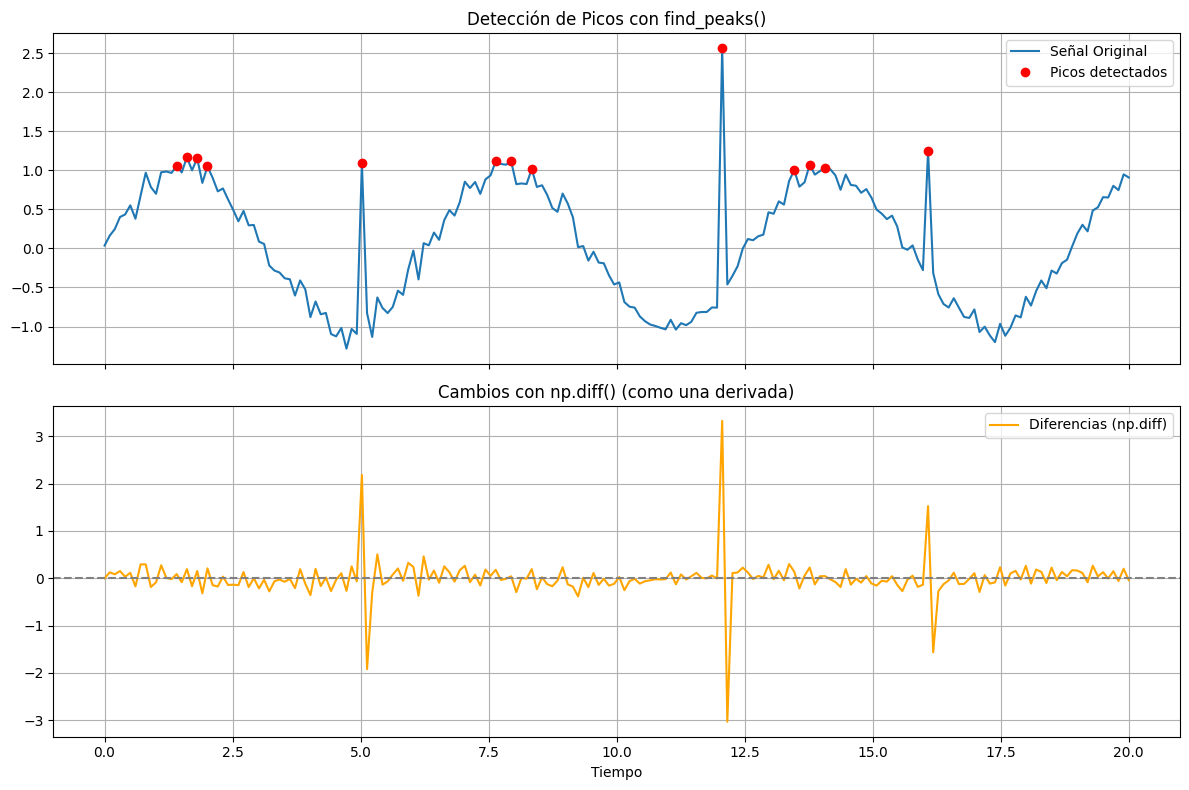

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# === 1. Crear datos simulados con picos manuales ===
x = np.linspace(0, 20, 200)
y = np.sin(x) + np.random.normal(0, 0.1, len(x))  # Señal ruidosa
y[50] += 2   # Pico manual
y[120] += 3  # Otro pico
y[160] += 1.5

# === 2. Detectar picos con find_peaks (método 1) ===
peaks, _ = find_peaks(y, height=1)  # Solo picos altos (>1)

# === 3. Calcular diferencias (np.diff) para ver cambios bruscos (método 2) ===
dy = np.diff(y)
dy = np.insert(dy, 0, 0)  # Alinear longitud con y

# === 4. Gráfica combinada de ambos enfoques ===
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# -- Señal original con picos detectados
axs[0].plot(x, y, label='Señal Original')
axs[0].plot(x[peaks], y[peaks], 'ro', label='Picos detectados')
axs[0].set_title('Detección de Picos con find_peaks()')
axs[0].legend()
axs[0].grid(True)

# -- Cambios bruscos (derivada)
axs[1].plot(x, dy, label='Diferencias (np.diff)', color='orange')
axs[1].axhline(0, color='gray', linestyle='--')
axs[1].set_title('Cambios con np.diff() (como una derivada)')
axs[1].legend()
axs[1].grid(True)

plt.xlabel('Tiempo')
plt.tight_layout()
plt.show()



In [ ]:
import datetime
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource

output_notebook()

# Datos
fecha_dia1 = '19581227'
datos_manana = [1280, 1097, 945, 884, 975, 1097, 1402, 1646, 1859, 1981, 1951, 1829]
datos_tarde = [1554, 1341, 1067, 853, 792, 823, 1067, 1250, 1494, 1615, 1676, 1585]

# Crear listas con fechas y datos
lista_fecha = []
lista_datos = []

for i, valor in enumerate(datos_manana):
    fecha_hora = datetime.datetime(int(fecha_dia1[:4]), int(fecha_dia1[4:6]), int(fecha_dia1[6:]), hour=i)
    lista_fecha.append(fecha_hora)
    lista_datos.append(valor)

for i, valor in enumerate(datos_tarde):
    fecha_hora = datetime.datetime(int(fecha_dia1[:4]), int(fecha_dia1[4:6]), int(fecha_dia1[6:]), hour=12 + i)
    lista_fecha.append(fecha_hora)
    lista_datos.append(valor)

# Crear DataFrame
df = pd.DataFrame({'fecha': lista_fecha, 'dato': lista_datos})
df = df.sort_values('fecha')

# Calcular mediana móvil ventana 3
window_size = 3
df['mediana_movil'] = df['dato'].rolling(window=window_size, center=True).median()

# Preparar para Bokeh
source = ColumnDataSource(df)

# Crear figura
p = figure(title="Datos horarios y Mediana Móvil", x_axis_type='datetime',
           width=900, height=400, tools="pan,wheel_zoom,box_zoom,reset")

# Línea datos originales
p.line('fecha', 'dato', source=source, line_width=2, color='blue', legend_label="Dato Original")

# Línea mediana móvil
p.line('fecha', 'mediana_movil', source=source, line_width=2, color='red', legend_label="Mediana Móvil")

# Configuraciones
p.legend.location = "top_left"
p.xaxis.axis_label = 'Fecha y Hora'
p.yaxis.axis_label = 'Valor'

show(p)


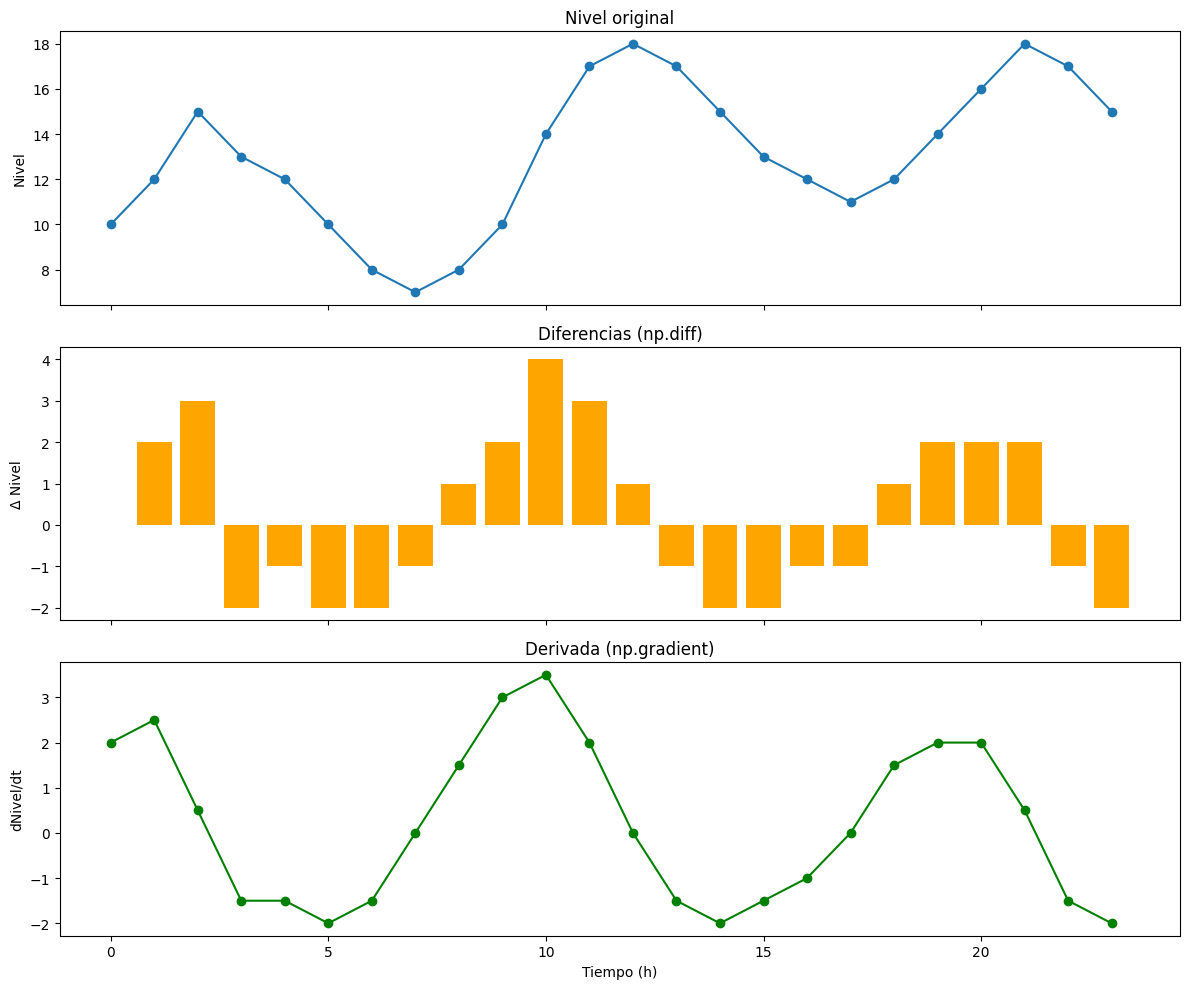

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Paso 1: Datos simulados ===
# Supongamos que son datos de nivel de marea cada hora
tiempo = np.arange(0, 24, 1)  # 24 horas
nivel = np.array([10, 12, 15, 13, 12, 10, 8, 7, 8, 10, 14, 17, 18, 17, 15, 13, 12, 11, 12, 14, 16, 18, 17, 15])

# === Paso 2: Cambios con diferencias (np.diff) ===
diferencias = np.diff(nivel)

# === Paso 3: Derivadas con np.gradient ===
# np.gradient permite ver cambios "instantáneos", y mantiene mismo tamaño que la serie original
derivada = np.gradient(nivel)

# === Paso 4: Visualización ===
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Gráfica original
axs[0].plot(tiempo, nivel, marker='o')
axs[0].set_title("Nivel original")
axs[0].set_ylabel("Nivel")

# Diferencias con np.diff
axs[1].bar(tiempo[1:], diferencias, color='orange')
axs[1].set_title("Diferencias (np.diff)")
axs[1].set_ylabel("Δ Nivel")

# Derivadas con np.gradient
axs[2].plot(tiempo, derivada, color='green', marker='o')
axs[2].set_title("Derivada (np.gradient)")
axs[2].set_ylabel("dNivel/dt")
axs[2].set_xlabel("Tiempo (h)")

plt.tight_layout()
plt.show()


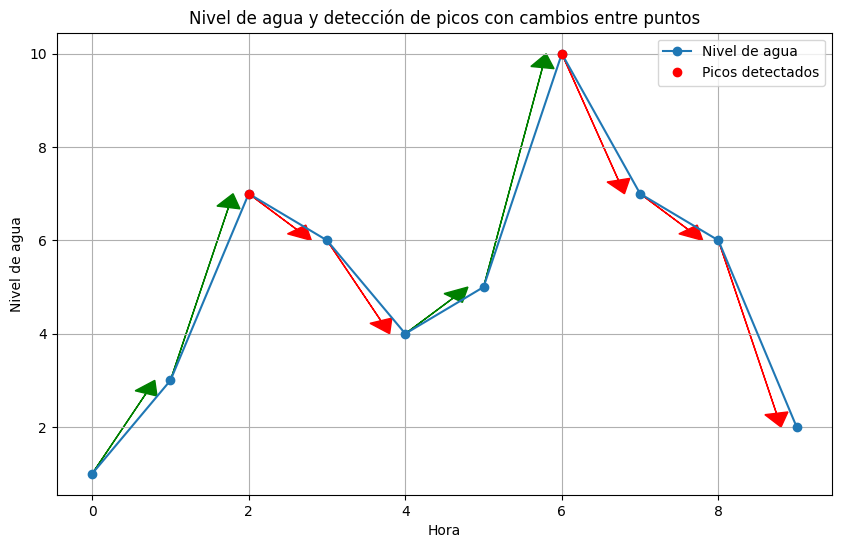

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Datos simulados: nivel de agua cada hora
datos = np.array([1, 3, 7, 6, 4, 5, 10, 7, 6, 2])
tiempo = np.arange(len(datos))  # Horas: 0,1,...,9

# Detección de picos con find_peaks
picos, _ = find_peaks(datos, height=0)

# Diferencias entre puntos consecutivos
diferencias = np.diff(datos)

# Graficar datos y picos
plt.figure(figsize=(10,6))
plt.plot(tiempo, datos, marker='o', label='Nivel de agua')
plt.plot(picos, datos[picos], 'ro', label='Picos detectados')

# Graficar flechas para diferencias (cambios)
for i in range(len(diferencias)):
    x_start = tiempo[i]
    y_start = datos[i]
    dx = 1
    dy = diferencias[i]
    color = 'green' if dy > 0 else 'red'
    plt.arrow(x_start, y_start, dx*0.8, dy, color=color, head_width=0.3, head_length=0.3, length_includes_head=True)

plt.title("Nivel de agua y detección de picos con cambios entre puntos")
plt.xlabel("Hora")
plt.ylabel("Nivel de agua")
plt.legend()
plt.grid(True)
plt.show()


Support for third party widgets will remain active for the duration of the session. To disable support:

Valor promedio: 5.10
Valores dentro del rango [4.10, 6.10]: [6 5 6]
Número de valores que se mantienen cerca del promedio: 3


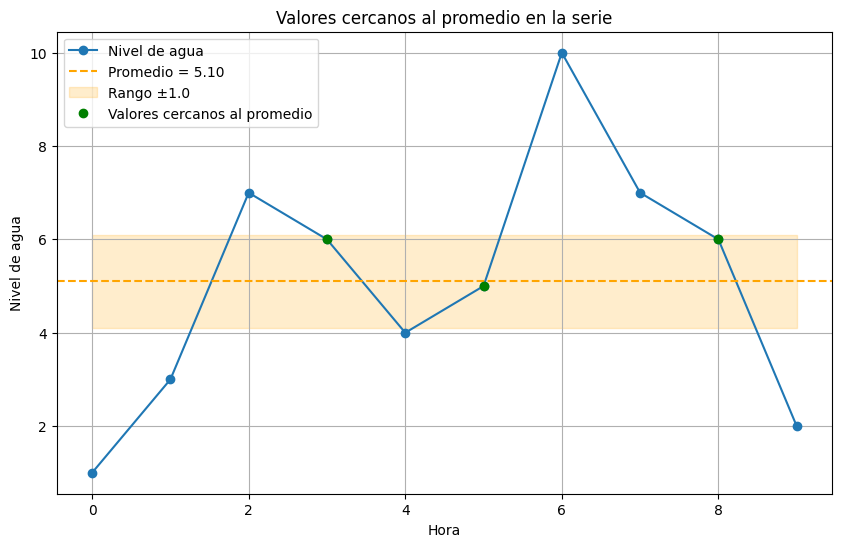

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.array([1, 3, 7, 6, 4, 5, 10, 7, 6, 2])
tiempo = np.arange(len(datos))

# 1. Calcular promedio
promedio = np.mean(datos)
print(f"Valor promedio: {promedio:.2f}")

# 2. Definir rango de tolerancia
tolerancia = 1.0

# 3. Encontrar valores dentro del rango (promedio ± tolerancia)
indices_cercanos = np.where((datos >= promedio - tolerancia) & (datos <= promedio + tolerancia))[0]
valores_cercanos = datos[indices_cercanos]
print(f"Valores dentro del rango [{promedio - tolerancia:.2f}, {promedio + tolerancia:.2f}]: {valores_cercanos}")

# 4. Contar repeticiones
conteo = len(valores_cercanos)
print(f"Número de valores que se mantienen cerca del promedio: {conteo}")

# Graficar serie con marcado en valores cercanos al promedio
plt.figure(figsize=(10,6))
plt.plot(tiempo, datos, marker='o', label='Nivel de agua')
plt.axhline(promedio, color='orange', linestyle='--', label=f'Promedio = {promedio:.2f}')
plt.fill_between(tiempo, promedio - tolerancia, promedio + tolerancia, color='orange', alpha=0.2, label=f'Rango ±{tolerancia}')

# Marcar puntos cercanos al promedio
plt.plot(indices_cercanos, valores_cercanos, 'go', label='Valores cercanos al promedio')

plt.title("Valores cercanos al promedio en la serie")
plt.xlabel("Hora")
plt.ylabel("Nivel de agua")
plt.legend()
plt.grid(True)
plt.show()


Support for third party widgets will remain active for the duration of the session. To disable support:

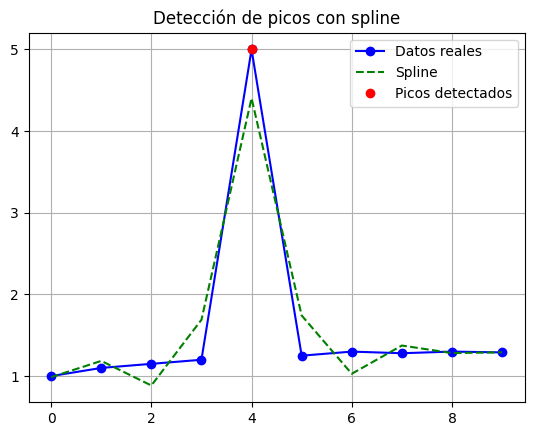

In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

x = np.arange(10)
y = np.array([1.0, 1.1, 1.15, 1.2, 5.0, 1.25, 1.3, 1.28, 1.3, 1.29])  # 5.0 es un pico raro

spline = UnivariateSpline(x, y, s=1)
y_spline = spline(x)

residuo = np.abs(y - y_spline)
umbral = 0.5

picos = np.where(residuo > umbral)[0]

plt.plot(x, y, 'bo-', label='Datos reales')
plt.plot(x, y_spline, 'g--', label='Spline')
plt.plot(x[picos], y[picos], 'ro', label='Picos detectados')
plt.legend()
plt.title("Detección de picos con spline")
plt.grid(True)
plt.show()


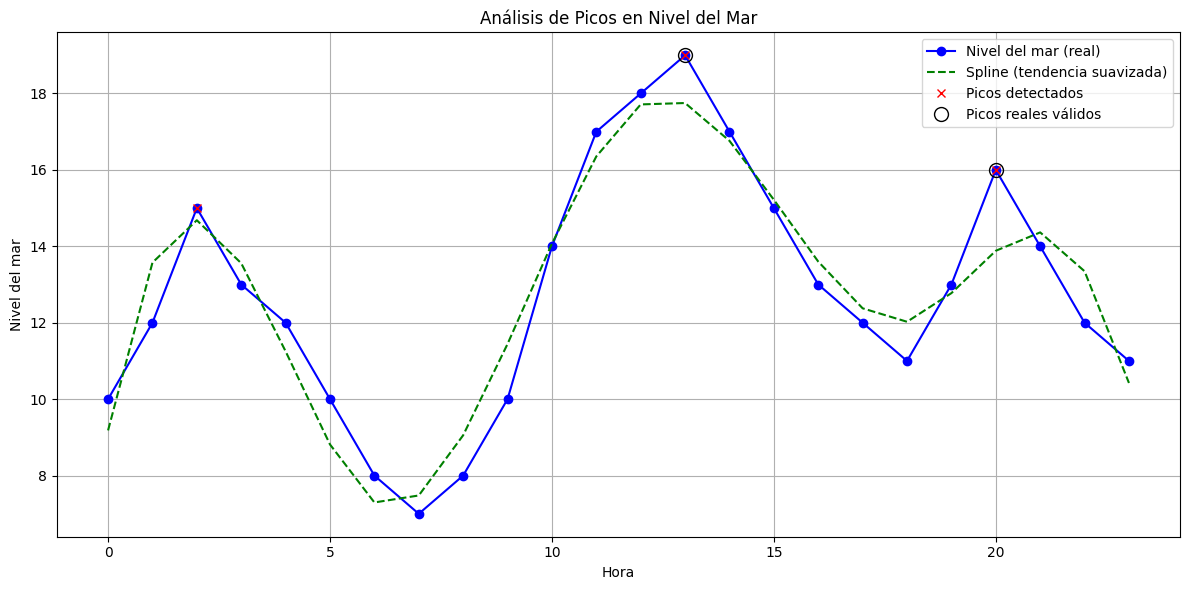

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks

# === Datos simulados de nivel del mar por hora ===
tiempo = np.arange(0, 24, 1)
nivel = np.array([10, 12, 15, 13, 12, 10, 8, 7, 8, 10, 14, 17, 18, 19, 17, 15, 13, 12, 11, 13, 16, 14, 12, 11])

# === Suavizado con Spline ===
spline = UnivariateSpline(tiempo, nivel, s=20)
nivel_suavizado = spline(tiempo)

# === Detección de picos reales con find_peaks ===
picos, _ = find_peaks(nivel)

# === Evaluación de picos reales válidos (comparación con spline) ===
umbral = 0.9  # pico debe diferir del suavizado en al menos ±0.9
picos_validos = [p for p in picos if abs(nivel[p] - nivel_suavizado[p]) > umbral]

# === Graficar todo ===
plt.figure(figsize=(12, 6))
plt.plot(tiempo, nivel, 'o-b', label='Nivel del mar (real)')
plt.plot(tiempo, nivel_suavizado, 'g--', label='Spline (tendencia suavizada)')
plt.plot(tiempo[picos], nivel[picos], 'rx', label='Picos detectados')
plt.plot(tiempo[picos_validos], nivel[picos_validos], 'ko', markersize=10, fillstyle='none', label='Picos reales válidos')

plt.title("Análisis de Picos en Nivel del Mar")
plt.xlabel("Hora")
plt.ylabel("Nivel del mar")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


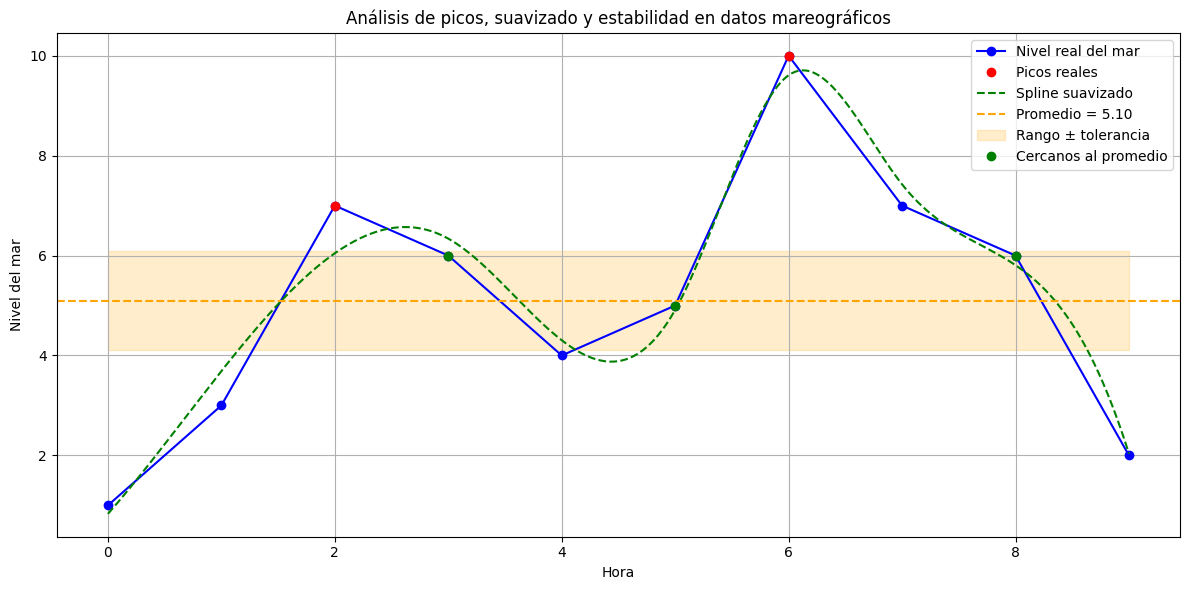

In [ ]:
#GENERAL
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline

# === Datos simulados (nivel del mar por hora) ===
datos = np.array([1, 3, 7, 6, 4, 5, 10, 7, 6, 2])
tiempo = np.arange(len(datos))

# === Promedio y tolerancia ===
promedio = np.mean(datos)
tolerancia = 1.0
indices_cercanos = np.where((datos >= promedio - tolerancia) & (datos <= promedio + tolerancia))[0]
valores_cercanos = datos[indices_cercanos]

# === Detección de picos reales ===
picos, _ = find_peaks(datos)

# === Spline fit (suavizado) ===
spline = UnivariateSpline(tiempo, datos, s=2)  # s controla el suavizado
tiempo_suave = np.linspace(tiempo.min(), tiempo.max(), 500)
spline_suave = spline(tiempo_suave)

# === Graficar ===
plt.figure(figsize=(12, 6))

# Línea base de datos
plt.plot(tiempo, datos, 'b-o', label='Nivel real del mar')

# Picos detectados
plt.plot(tiempo[picos], datos[picos], 'ro', label='Picos reales')

# Spline (suavizado)
plt.plot(tiempo_suave, spline_suave, 'g--', label='Spline suavizado')

# Promedio y rango
plt.axhline(promedio, color='orange', linestyle='--', label=f'Promedio = {promedio:.2f}')
plt.fill_between(tiempo, promedio - tolerancia, promedio + tolerancia, color='orange', alpha=0.2, label='Rango ± tolerancia')

# Marcar valores cercanos al promedio
plt.plot(indices_cercanos, valores_cercanos, 'go', label='Cercanos al promedio')

# Estética
plt.title("Análisis de picos, suavizado y estabilidad en datos mareográficos")
plt.xlabel("Hora")
plt.ylabel("Nivel del mar")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# bokeh
import numpy as np
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import Span, BoxAnnotation, Legend, LegendItem, HoverTool, ColumnDataSource

output_notebook()  # Para mostrar el gráfico dentro de Jupyter Notebook (puedes omitir si usas script)

# === Datos ===
datos = np.array([1, 3, 7, 6, 4, 5, 10, 7, 6, 2])
tiempo = np.arange(len(datos))

# === Promedio y rango de tolerancia ===
promedio = np.mean(datos)
tolerancia = 1.0
indices_cercanos = np.where((datos >= promedio - tolerancia) & (datos <= promedio + tolerancia))[0]
valores_cercanos = datos[indices_cercanos]

# === Picos detectados ===
picos, _ = find_peaks(datos)

# === Spline suavizado ===
spline = UnivariateSpline(tiempo, datos, s=2)
tiempo_suave = np.linspace(tiempo.min(), tiempo.max(), 500)
spline_suave = spline(tiempo_suave)

# === Preparar datos para Bokeh ===
source_datos = ColumnDataSource(data=dict(x=tiempo, y=datos))
source_picos = ColumnDataSource(data=dict(x=tiempo[picos], y=datos[picos]))
source_spline = ColumnDataSource(data=dict(x=tiempo_suave, y=spline_suave))
source_cercanos = ColumnDataSource(data=dict(x=indices_cercanos, y=valores_cercanos))

# === Crear figura ===
p = figure(title="Análisis de picos, suavizado y estabilidad en datos mareográficos",
           x_axis_label='Hora', y_axis_label='Nivel del mar',
           width=800, height=400, tools="pan,wheel_zoom,box_zoom,reset,save")

# Línea de datos reales
line_datos = p.line('x', 'y', source=source_datos, line_width=2, color='blue', legend_label="Nivel real del mar")
circle_datos = p.circle('x', 'y', source=source_datos, size=6, color='blue')

# Picos detectados
picos_glyph = p.circle('x', 'y', source=source_picos, size=10, color='red', legend_label="Picos reales")

# Spline suavizado
spline_line = p.line('x', 'y', source=source_spline, line_width=2, line_dash='dashed', color='green', legend_label="Spline suavizado")

# Banda de tolerancia
box = BoxAnnotation(top=promedio + tolerancia, bottom=promedio - tolerancia, fill_alpha=0.1, fill_color='orange')
p.add_layout(box)

# Línea promedio
span = Span(location=promedio, dimension='width', line_color='orange', line_dash='dashed', line_width=2)
p.add_layout(span)

# Puntos cercanos al promedio
p_cercanos = p.circle('x', 'y', source=source_cercanos, size=8, color='green', legend_label="Cercanos al promedio")

# Hover tool para datos
hover = HoverTool(renderers=[circle_datos],
                  tooltips=[("Hora", "@x"), ("Nivel", "@y")])
p.add_tools(hover)

# Hover para picos
hover_picos = HoverTool(renderers=[picos_glyph],
                        tooltips=[("Hora (pico)", "@x"), ("Nivel", "@y")])
p.add_tools(hover_picos)

# Hover para puntos cercanos al promedio
hover_cercanos = HoverTool(renderers=[p_cercanos],
                           tooltips=[("Hora", "@x"), ("Nivel cercano", "@y")])
p.add_tools(hover_cercanos)

p.legend.location = "top_left"
p.legend.click_policy = "hide"  # Permite ocultar/mostrar capas

show(p)
